In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

C:\Users\kevin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


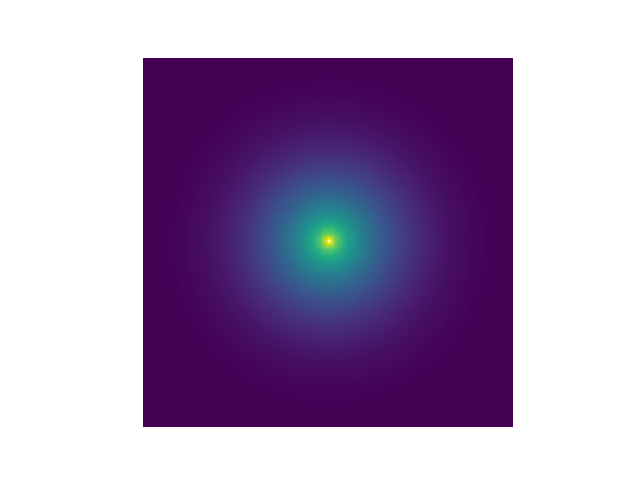

<IPython.core.display.Javascript object>


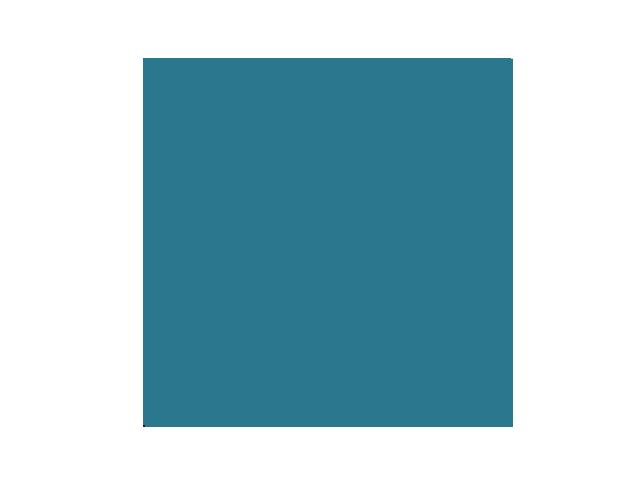

(-0.5, 199.5, -0.5, 199.5)

In [21]:
h = 0.01


mu = np.array(([0,0],))
x = np.arange(-1,1,h)
y = np.arange(-1,1,h)

X, Y = np.meshgrid(x,y)
XY = np.column_stack((X.flatten(), Y.flatten()))


f = []
flat = []
for xy in XY:
    f.append(1/(1-np.exp(-np.min(np.linalg.norm(xy - mu, axis = 1)**2) / 0.1)))
    flat.append(1)
f = np.array(f).reshape(X.shape)
flat[0] = 0
flat[-1] = 2.5
flat = np.array(flat).reshape(X.shape)

plt.imshow(np.sqrt(np.log(f)), origin = 1)
plt.axis('off')
plt.figure()
plt.imshow(flat, origin = 1)
plt.axis('off')





<IPython.core.display.Javascript object>


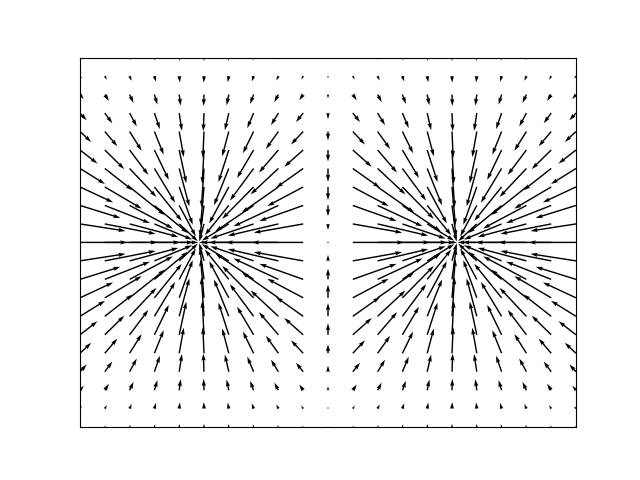

In [28]:
import time



def val_gd(xy, mu):
    #return 0, np.array([0,0])
    i = np.argmin(np.linalg.norm(xy-mu, axis = 1))
    d = np.linalg.norm(xy - mu[i])
    val, gd = -np.linalg.norm((xy-mu[i])/s)**2, -2 * (xy - mu[i]) / s**2
    if np.sum((d + 1e-6) > np.linalg.norm(xy-mu, axis = 1)) > 1:
        gd[0] = 0
    return val, gd

def real_val_gd(xy, mu):
    a,b = mu[0], mu[1]
    if np.linalg.norm(xy - b) < np.linalg.norm(xy - a):
        a,b = b,a
    n = b - a
    d = np.linalg.norm(n) / 2
    n /= 2 * d
    
    penetration = max(n @ (xy - a) - d/2,0)
    p = xy - penetration * n
    
    return -np.linalg.norm((xy-a)/s)**2 + 2 * np.linalg.norm((xy-p)/s)**2, -2 * (xy - a) / s**2 + 4 * (xy-p) / s**2
    


h = 0.1
s = 0.5
x = np.arange(-1,1+h/2,h)
y = np.arange(-1,1+h/2,h)
X, Y = np.meshgrid(x, y)
_XY = np.column_stack((X.flatten(), Y.flatten()))


def update(t):
#t = 0.5
    mu = np.array(([-t,0.],[t,0.]))
    df = []
    for xy in _XY:
        val, gd = val_gd(xy,mu)
        df.append(gd * np.exp(val))
    df = np.array(df)

    XY_prime = _XY + s**2 * df / 2
    XY_prime = XY_prime.reshape((*X.shape, 2))
    #XY = _XY.reshape(*X.shape,2)
    plt.gca().clear()
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.quiver(*_XY.T, *(s**2 * df / 2).T,angles='xy', scale_units='xy', scale=1)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    return 
    for i in range(0, len(XY_prime), len(XY_prime) // 40):
        plt.plot(XY_prime[i,:,0], XY_prime[i,:,1], color = 'blue')
    for i in range(0, len(XY_prime), len(XY_prime) // 40):
        plt.plot(XY_prime[:,i,0], XY_prime[:,i,1], color = 'blue')
    for i in range(0, len(XY_prime), len(XY_prime) // 40):
        plt.plot(XY[i,:,0], XY[i,:,1], color = 'blue', linestyle = '--', alpha = 0.3)
    for i in range(0, len(XY_prime), len(XY_prime) // 40):
        plt.plot(XY[:,i,0], XY[:,i,1], color = 'blue', linestyle = '--', alpha = 0.3)
    plt.scatter(*mu.T, color = 'black')
plt.figure()
ani = FuncAnimation(plt.gcf(), update,
                    np.concatenate([np.arange(1,0.3, -0.01), np.arange(0.3, 1, 0.01)], axis = 0),
                    interval = 50)
ani.save('ConflictAnimation.gif', writer='imagemagick', fps=30)
plt.show()